# Student Performance Analysis

The aim of this project is to analyze student demographics, learning styles, study habits, and other factors to predict their academic performance. By exploring key variables such as study hours, attendance, stress levels, and exam scores, we aim to uncover patterns that influence student success.


# Data Dictionary

| Variable                              | Description |
|----------------------------------------|-------------|
| **Student_ID**                         | Unique student identifier |
| **Age**                                | Age of the student |
| **Gender**                             | Gender of the student (Male, Female) |
| **Study_Hours_per_Week**               | Number of hours spent studying per week |
| **Preferred_Learning_Style**           | Preferred learning style (Visual, Auditory, Kinesthetic, Reading/Writing) |
| **Online_Courses_Completed**           | Number of online courses completed by the student |
| **Participation_in_Discussions**        | Whether the student participates in discussions (Yes, No) |
| **Assignment_Completion_Rate (%)**      | Percentage of assignments completed by the student |
| **Exam_Score (%)**                      | Percentage score obtained in exams |
| **Attendance_Rate (%)**                 | Attendance percentage of the student |
| **Use_of_Educational_Tech**             | Whether the student uses educational technology (Yes, No) |
| **Self_Reported_Stress_Level**          | Self-reported stress level (Low, Medium, High) |
| **Time_Spent_on_Social_Media (hours/week)** | Time spent on social media per week in hours |
| **Sleep_Hours_per_Night**               | Average sleep hours per night |
| **Final_Grade**                         | Final grade obtained by the student (A, B, C, D, etc.) |
 B, C, D, etc.)  


### Importing Libraries 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv(r"datasets\student_performance_large_dataset.csv")

In [8]:
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [10]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_rows}")

Duplicate Rows: 0


## Descriptive Statistics

In [12]:
# Summary statistics for numerical columns
numerical_data = df.describe()
numerical_data

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [13]:
# Summary for categorical columns
categorical_data = df.describe(include=['object'])
categorical_data

,Student_ID,Gender,Preferred_Learning_Style,Participation_in_Discussions,Use_of_Educational_Tech,Self_Reported_Stress_Level,Final_Grade
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,3,4,2,2,3,4
top,S00001,Female,Visual,Yes,Yes,Medium,A
freq,1,4846,2523,5996,7022,5015,2678


In [14]:
#check null values
df.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [15]:
df.shape

(10000, 15)

In [16]:
df=df.drop(columns="Student_ID")

# Feature Engineering 

### Feature Scaling 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df[["Study_Hours_per_Week", "Exam_Score (%)", "Time_Spent_on_Social_Media (hours/week)"]] = scaler.fit_transform(
    df[["Study_Hours_per_Week", "Exam_Score (%)", "Time_Spent_on_Social_Media (hours/week)"]]
)
df.head(3)

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,1.605127,Kinesthetic,14,Yes,100,-0.067365,66,Yes,High,-0.657989,8,C
1,29,Female,0.220714,Reading/Writing,20,No,71,-1.710558,57,Yes,Medium,1.447930,8,D
2,20,Female,1.528215,Kinesthetic,11,No,60,-1.540573,79,Yes,Low,-0.214638,7,D


### FEATURE EXTRACTION: Creating new meaningful features

In [22]:
df["Study_Efficiency"] = df["Exam_Score (%)"] / df["Study_Hours_per_Week"]
df["Study_Efficiency"].head()

0   -0.041969
1   -7.750115
2   -1.008086
3    0.009849
4    1.691897
Name: Study_Efficiency, dtype: float64

In [23]:
df["Social_Media_Impact"] = df["Time_Spent_on_Social_Media (hours/week)"] / df["Study_Hours_per_Week"]
df["Social_Media_Impact"].head()

0   -0.409929
1    6.560213
2   -0.140450
3   -0.924356
4   -5.093326
Name: Social_Media_Impact, dtype: float64

In [24]:
df["Attendance_Impact"] = (df["Attendance_Rate (%)"] / 100) * df["Exam_Score (%)"]
df["Attendance_Impact"].head()

0   -0.044461
1   -0.975018
2   -1.217053
3   -0.006422
4   -0.378823
Name: Attendance_Impact, dtype: float64

### ENCODING: Convert Categorical Variables to Numeric


In [26]:
columns = df.columns
columns

Index(['Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style',
       'Online_Courses_Completed', 'Participation_in_Discussions',
       'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
       'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Study_Efficiency',
       'Social_Media_Impact', 'Attendance_Impact'],
      dtype='object')

In [27]:
for i in columns:
    print(i , df[i].unique() ,' \n')

Age [18 29 20 23 19 28 27 22 25 24 26 21]  

Gender ['Female' 'Male' 'Other']  

Study_Hours_per_Week [ 1.60512733  0.22071395  1.52821548 -1.08678758 -0.24075718 -0.08693347
  1.68203919 -1.00987572  1.37439177  0.60527322  0.98983249  1.29747991
 -1.31752314  0.06689024 -1.24061129 -1.47134685  1.06674435  0.68218508
  0.83600879  0.91292064 -0.31766903 -1.62517056 -0.16384532  0.37453766
 -0.5484046  -1.16369943  1.45130362  0.45144951 -0.47149274 -1.70208241
 -0.62531645  0.2976258  -1.394435    1.1436562  -1.54825871 -0.39458089
  0.52836137  1.22056806 -0.93296387 -0.85605201  0.14380209 -0.01002161
 -0.77914016  0.75909693 -0.70222831]  

Preferred_Learning_Style ['Kinesthetic' 'Reading/Writing' 'Auditory' 'Visual']  

Online_Courses_Completed [14 20 11  0 19  5 13 16  7 18  4 17  9  6  3  1 12 10  8  2 15]  

Participation_in_Discussions ['Yes' 'No']  

Assignment_Completion_Rate (%) [100  71  60  63  59  91  88  52  74  77  67  80  85  81  50  89  90  68
  96  86  79  76  55  

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Gender", "Use_of_Educational_Tech", "Self_Reported_Stress_Level" , "Final_Grade" , "Participation_in_Discussions" , "Preferred_Learning_Style" ]
encoder = LabelEncoder()

for i in categorical_cols:
    encoder.fit(df[i])
    df[i] = encoder.fit_transform(df[i])
    print(i , df[i].unique() ,' \n')
 

Gender [0 1 2]  

Use_of_Educational_Tech [1 0]  

Self_Reported_Stress_Level [0 2 1]  

Final_Grade [2 3 1 0]  

Participation_in_Discussions [1 0]  

Preferred_Learning_Style [1 2 0 3]  



In [29]:
df.head(10)

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Study_Efficiency,Social_Media_Impact,Attendance_Impact
0,18,0,1.605127,1,14,1,100,-0.067365,66,1,0,-0.657989,8,2,-0.041969,-0.409929,-0.044461
1,29,0,0.220714,2,20,0,71,-1.710558,57,1,2,1.447930,8,3,-7.750115,6.560213,-0.975018
2,20,0,1.528215,1,11,0,60,-1.540573,79,1,1,-0.214638,7,3,-1.008086,-0.140450,-1.217053
3,23,0,-1.086788,0,0,1,63,-0.010703,60,1,1,1.004579,10,1,0.009849,-0.924356,-0.006422
4,19,0,-0.240757,0,19,1,59,-0.407336,93,1,2,1.226255,8,2,1.691897,-5.093326,-0.378823
5,28,0,-0.086933,1,5,1,63,-0.917293,80,0,0,1.115417,8,3,10.551664,-12.830695,-0.733834
6,19,0,1.682039,2,13,1,91,-1.483911,66,1,1,1.669606,10,3,-0.882210,0.992608,-0.979381
7,27,1,-1.009876,2,5,1,88,-0.803969,76,1,1,-1.212178,6,2,0.796107,1.200324,-0.611017
8,22,1,1.374392,3,16,0,52,0.442591,70,0,1,1.226255,9,1,0.322027,0.892216,0.309814
9,28,2,0.605273,0,7,0,100,-0.860631,100,0,2,-1.101340,9,2,-1.421888,-1.819576,-0.860631


# Outlier Removal 

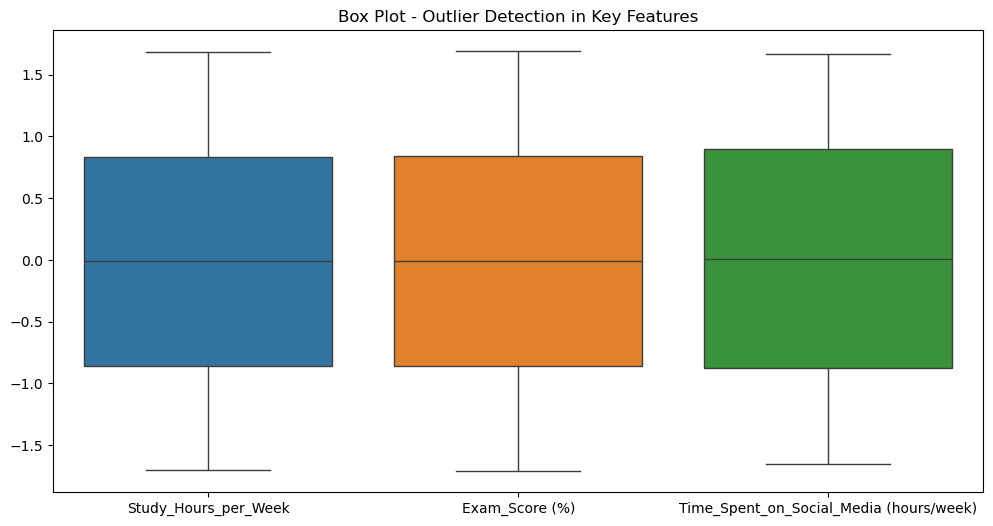

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Study_Hours_per_Week", "Exam_Score (%)", "Time_Spent_on_Social_Media (hours/week)"]])
plt.title("Box Plot - Outlier Detection in Key Features")

plt.show()

In [32]:
# numeric_cols = ["Study_Hours_per_Week", "Exam_Score (%)", "Time_Spent_on_Social_Media (hours/week)"]

# #using IQR method to remove outliers
# Q1 = df[numeric_cols].quantile(0.25)
# Q3 = df[numeric_cols].quantile(0.75)

# IQR = Q3 - Q1  # Interquartile Range
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[(df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)]  # Keep only non-outliers


In [33]:
# df.shape

# Exploratory Data Analysis  

In this exploratory data analysis, I will be visualizing the student performance dataset to gain insights into key factors affecting academic success. I will begin by examining the distribution of individual variables such as study hours, attendance, and exam scores. Then, I will explore relationships between independent variables (learning styles, social media usage, stress levels) and the target variable (Final Grade) to identify trends and patterns in student performance.


### Self_Reported_Stress_Level

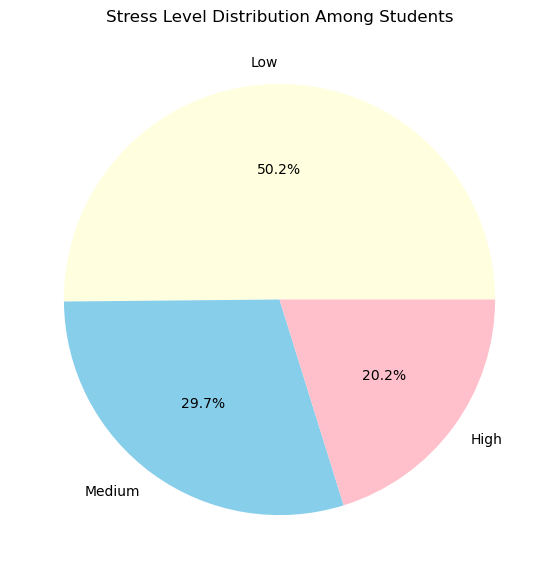

In [36]:
plt.figure(figsize=(7, 7))
df["Self_Reported_Stress_Level"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightyellow", "skyblue", "pink"], labels=["Low", "Medium", "High"])
plt.title("Stress Level Distribution Among Students")
plt.ylabel("")
plt.savefig("stressdistri.png")
plt.show()

The pie chart shows the distribution of student stress levels, categorized as Low, Medium, and High. A significant portion of students experience moderate to high stress, which may impact 
their academic performance and well-being. Managing stress through effective study habits, 
time management, and mental health support can help students perform better. Understanding 
these stress patterns allows educators to provide better support and create a balanced learning 
environment.

### Social Media Usage vs Exam Score

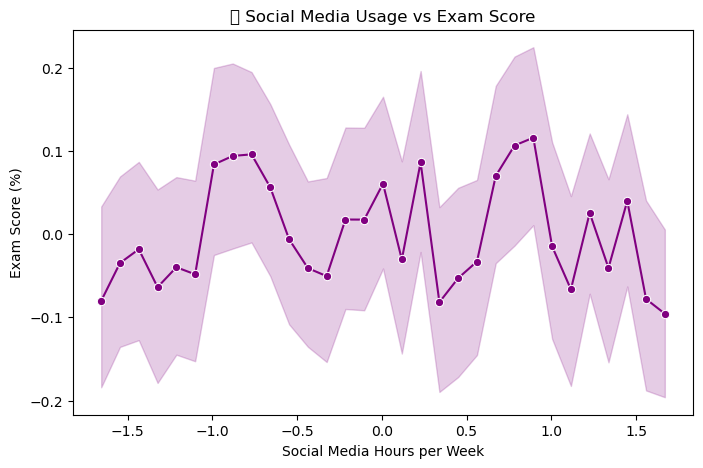

In [39]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df["Time_Spent_on_Social_Media (hours/week)"], y=df["Exam_Score (%)"], color="purple", marker="o")
plt.title("📱 Social Media Usage vs Exam Score")
plt.xlabel("Social Media Hours per Week")
plt.ylabel("Exam Score (%)")
plt.savefig("social.png")
plt.show()


The analysis of Social Media Usage vs Exam Score shows fluctuations in performance 
based on time spent online. While moderate usage appears to have a stable or slightly 
positive effect, excessive time on social media leads to inconsistent and declining exam 
scores.                
                                                                  
Similarly, the previous graphs highlighted factors like learning styles, stress levels, and 
participation, which also influence performance. Understanding these relationships can 
help students balance study habits and digital distractions for better academic outcomes. 


### Key Insights on Exam Performance

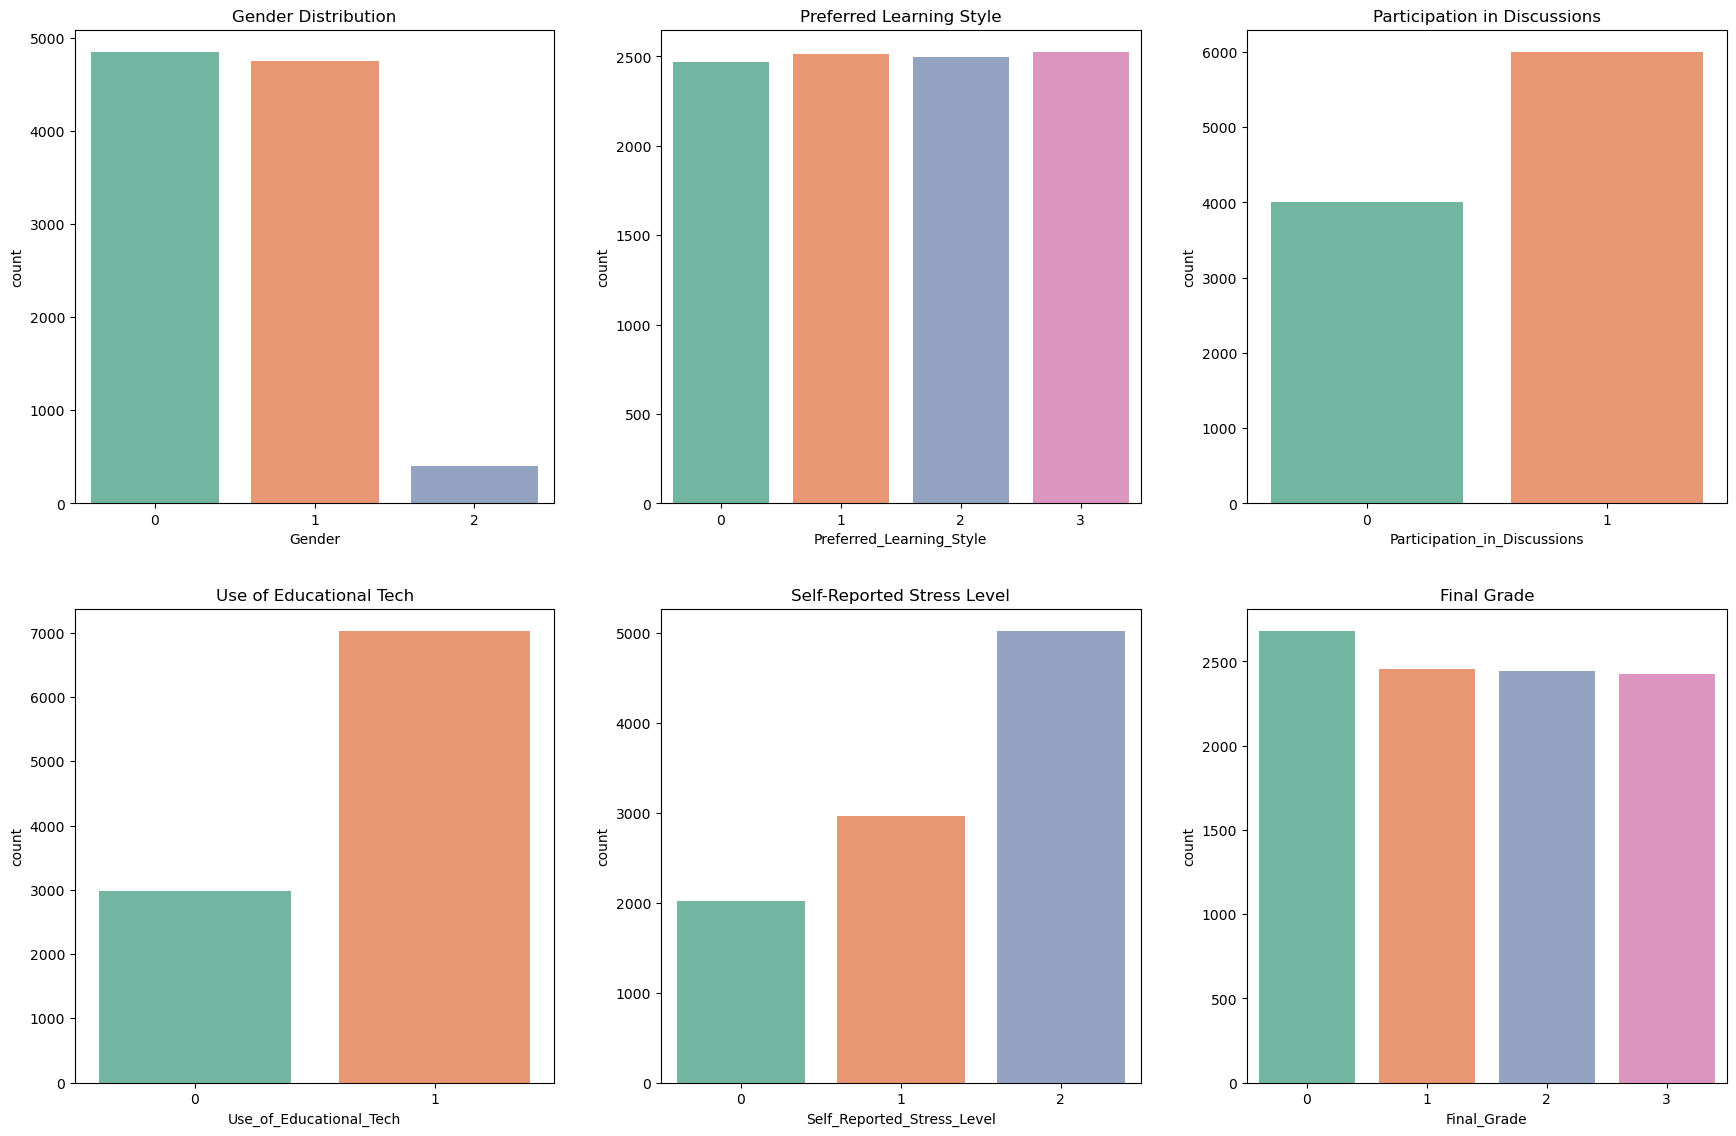

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size for better visibility
plt.figure(figsize=(18, 12))

# Define grid structure (2 rows, 3 columns)
grid_structure = (2, 3)

# Gender
plt.subplot(*grid_structure, 1)
sns.countplot(x=df['Gender'], palette="Set2").set_title("Gender Distribution")

# Preferred Learning Style
plt.subplot(*grid_structure, 2)
sns.countplot(x=df['Preferred_Learning_Style'], palette="Set2").set_title("Preferred Learning Style")

# Participation in Discussions
plt.subplot(*grid_structure, 3)
sns.countplot(x=df['Participation_in_Discussions'], palette="Set2").set_title("Participation in Discussions")

# Use of Educational Technology
plt.subplot(*grid_structure, 4)
sns.countplot(x=df['Use_of_Educational_Tech'], palette="Set2").set_title("Use of Educational Tech")

# Self-Reported Stress Level
plt.subplot(*grid_structure, 5)
sns.countplot(x=df['Self_Reported_Stress_Level'], palette="Set2").set_title("Self-Reported Stress Level")

# Final Grade
plt.subplot(*grid_structure, 6)
sns.countplot(x=df['Final_Grade'], palette="Set2").set_title("Final Grade")

# Adjust layout spacing for clarity
plt.tight_layout(pad=3.0)
plt.savefig("categorical_subplots.png")
plt.show()


The visualizations highlight key factors influencing students' academic performance. Gender 
Distribution and Preferred Learning Style show variations in student demographics and 
learning preferences. Participation in Discussions and Use of Educational Technology reflect 
engagement levels, impacting learning outcomes.                                                      
                                                         
Self-Reported Stress Levels indicate varying academic pressure, while Final Grade 
Distribution provides an overview of student performance. These insights help in 
understanding student behavior and identifying areas for improvement.

### Distribution of Student Performance Factors :

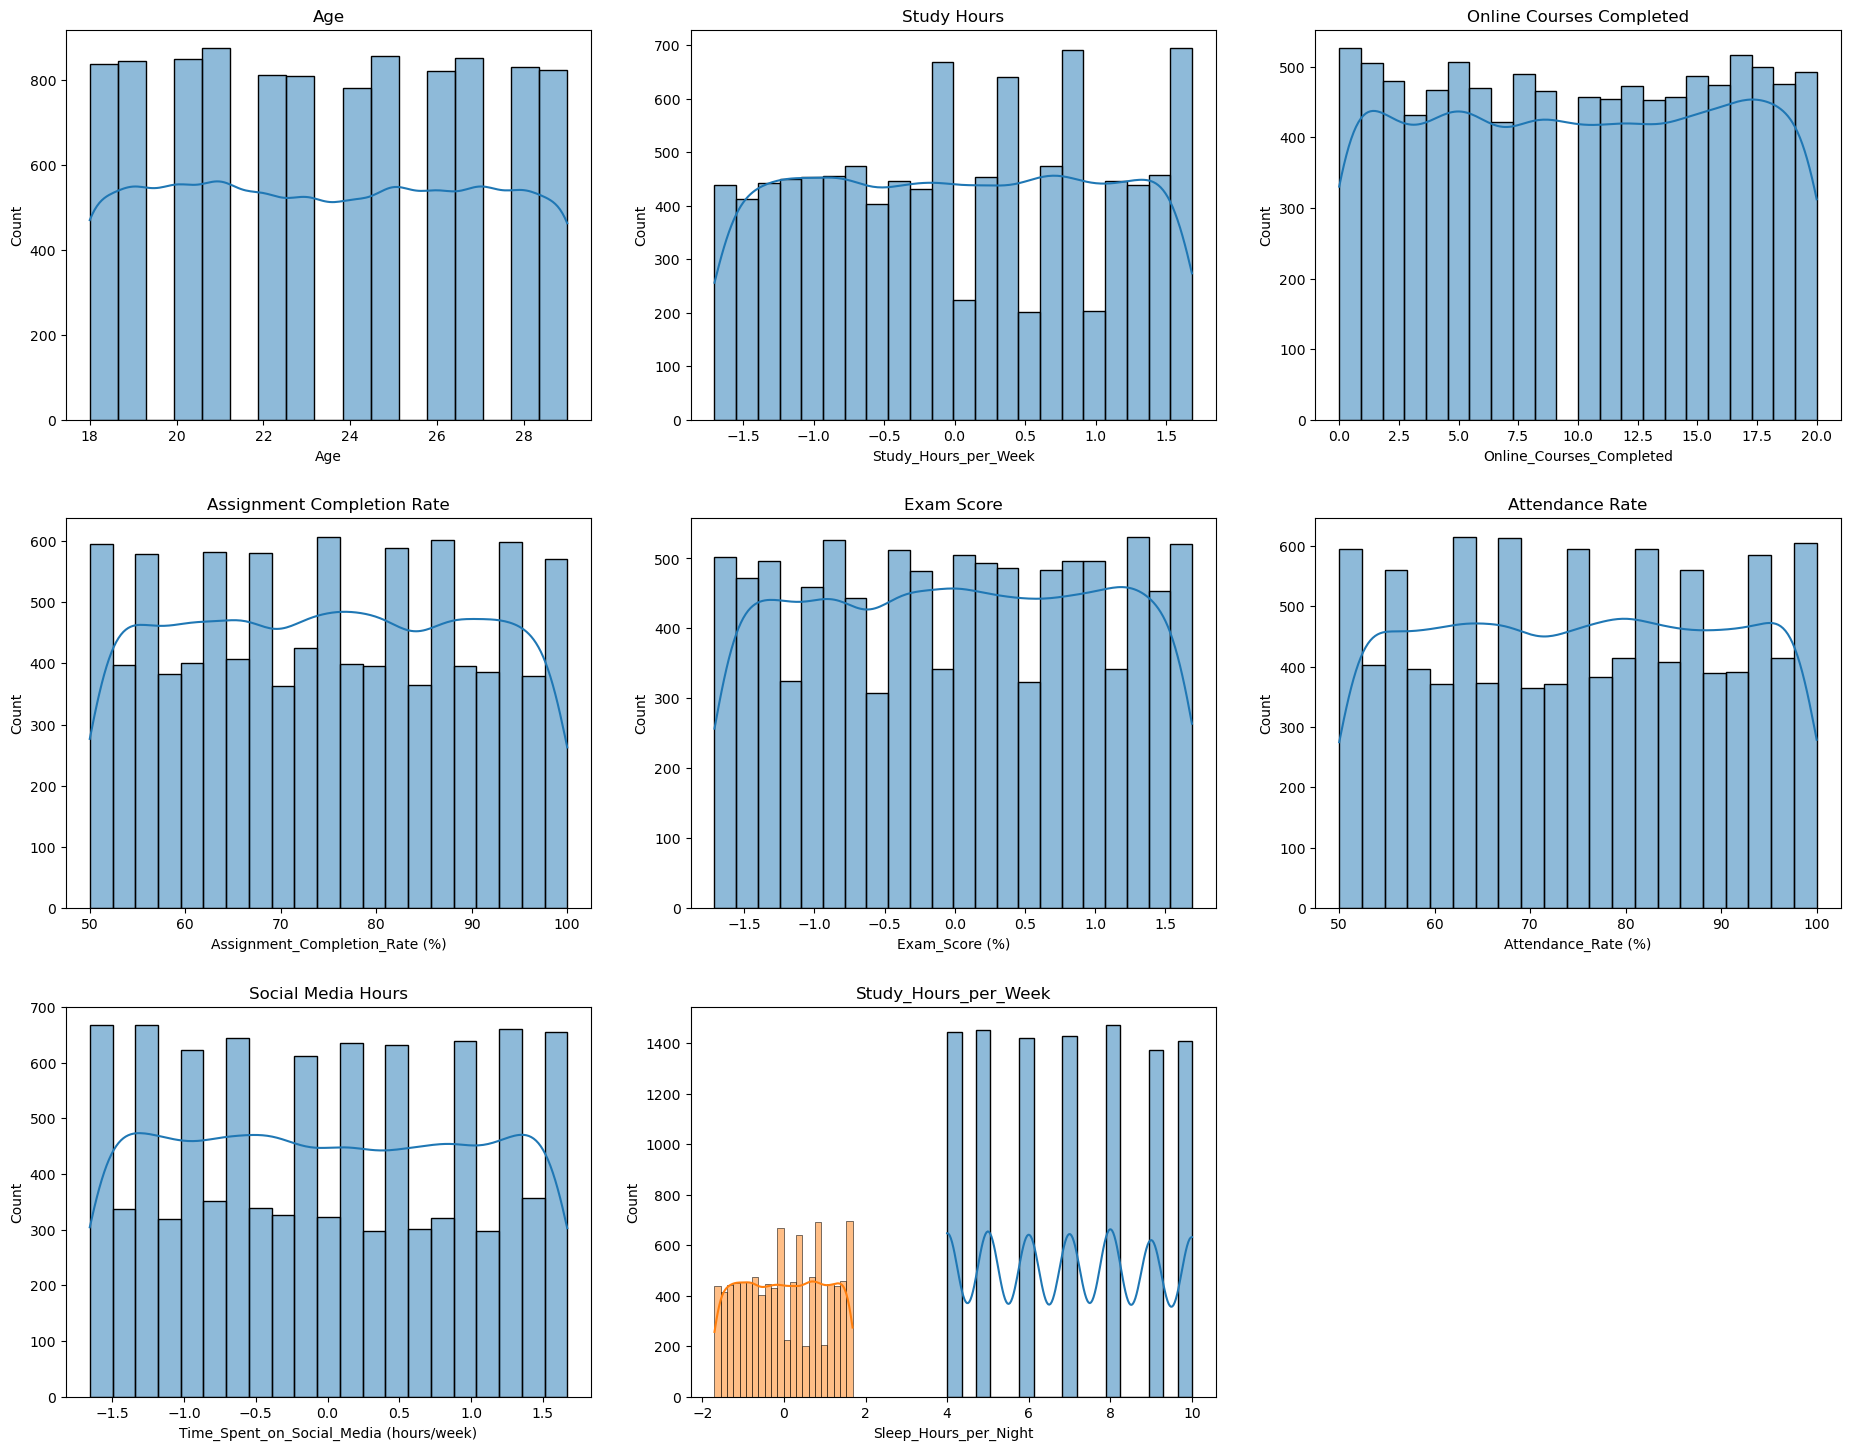

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size for better visibility
plt.figure(figsize=(19, 15))  

# Define grid structure (3 rows, 3 columns)
grid_structure = (3, 3)

# Age
plt.subplot(*grid_structure, 1)  
sns.histplot(df['Age'], kde=True).set_title("Age")

# Study Hours
plt.subplot(*grid_structure, 2)  
sns.histplot(df['Study_Hours_per_Week'], kde=True).set_title("Study Hours")

# Online Courses Completed
plt.subplot(*grid_structure, 3)  
sns.histplot(df['Online_Courses_Completed'], kde=True).set_title("Online Courses Completed")

# Assignment Completion Rate
plt.subplot(*grid_structure, 4)  
sns.histplot(df['Assignment_Completion_Rate (%)'], kde=True).set_title("Assignment Completion Rate")

# Exam Score
plt.subplot(*grid_structure, 5)  
sns.histplot(df['Exam_Score (%)'], kde=True).set_title("Exam Score")

# Attendance Rate
plt.subplot(*grid_structure, 6)  
sns.histplot(df['Attendance_Rate (%)'], kde=True).set_title("Attendance Rate")

# Time Spent on Social Media
plt.subplot(*grid_structure, 7)  
sns.histplot(df['Time_Spent_on_Social_Media (hours/week)'], kde=True).set_title("Social Media Hours")

# Sleep Hours per Night
plt.subplot(*grid_structure, 8)  
sns.histplot(df['Sleep_Hours_per_Night'], kde=True).set_title("Sleep Hours per Night")

plt.subplot(*grid_structure, 8)  
sns.histplot(df['Study_Hours_per_Week'], kde=True).set_title("Study_Hours_per_Week")

plt.tight_layout(pad=2.5)# Adjust layout spacing for clarity
plt.savefig("allhist.png")
plt.show()


The data shows interesting patterns about students' study habits and academic performance. 
The age distribution is spread out evenly, meaning students of different ages are well
represented. Study hours per week and online courses completed vary a lot, showing that 
some students study a lot while others spend less time on structured learning. The assignment 
completion rate and exam scores are mostly high, which suggests that many students are 
serious about their studies. Similarly, the attendance rate is also high, showing that regular 
class participation may help in better academic performance. 
                                                                                    
Looking at social media usage and sleep hours, we see some interesting trends. Some students 
spend a lot of time on social media, but it is unclear if this affects their studies. The variation 
in sleep hours per night shows that some students may not be getting enough rest, which could 
impact their focus and energy levels. A good balance between study time, sleep, and social 
media use may be important for better academic performance. These insights can help students 
and teachers find better ways to improve learning and success.

### Demographic Analysis: Age & Gender Distribution: 

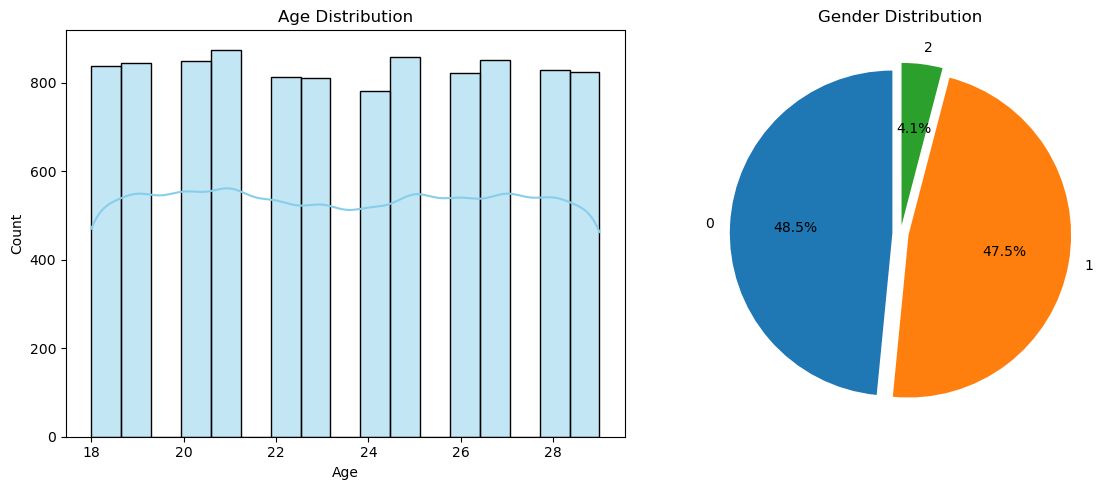

In [48]:
plt.figure(figsize=(12, 5))  # Adjust figure size

# Age Histogram
plt.subplot(1, 2, 1)  
sns.histplot(df['Age'], kde=True, color='skyblue').set_title("Age Distribution")

# Gender Pie Chart
plt.subplot(1, 2, 2)
gender_counts = df['Gender'].value_counts()  # Count categories

explode_values = [0.05] * len(gender_counts)  # Dynamically set explode for all categories

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',  
        startangle=90, explode=explode_values)  
plt.title("Gender Distribution")

plt.tight_layout()  # Adjust layout
plt.show()

The Age Distribution histogram shows a diverse spread of student ages, with a balanced 
mix across different age groups. This suggests that the dataset includes students from 
various academic levels. The Gender Distribution pie chart reveals a relatively balanced 
ratio between male and female students, ensuring that gender-based comparisons in 
academic performance and study habits can be meaningful. Understanding these 
demographics helps in analyzing how age and gender influence study patterns, learning 
preferences, and overall academic performance. 


### Study Hours Distribution

<Axes: xlabel='Sleep_Hours_per_Night', ylabel='count'>

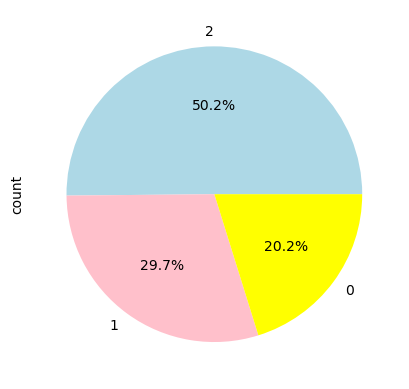

In [51]:
# Study Hours Distribution
#sns.histplot(df["Study_Hours_per_Week"], bins=10, kde=True, color="blue")

# Stress Level Distribution (Pie Chart)
df["Self_Reported_Stress_Level"].value_counts().plot.pie(autopct="%1.1f%%",colors=["lightblue", "pink" , "yellow"])

# Sleep Hours Distribution
sns.histplot(df["Sleep_Hours_per_Night"], bins=10, kde=True, color="green")

# Gender Distribution (Pie Chart)
#df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "pink" , "yellow"], startangle=90)


The pie chart represents the distribution of study hours per week among students. 50.5% of 
students fall into one category, while 49.5% belong to the other. Within these groups, 50.2% 
and 29.7% are in one half, whereas 20.2% are in the other. This indicates that students have a 
nearly balanced study pattern, but a significant portion may be studying less than expected. 
Understanding these study habits can help improve learning strategies and academic 
performance.

### How Different Student Groups Perform in Exams 

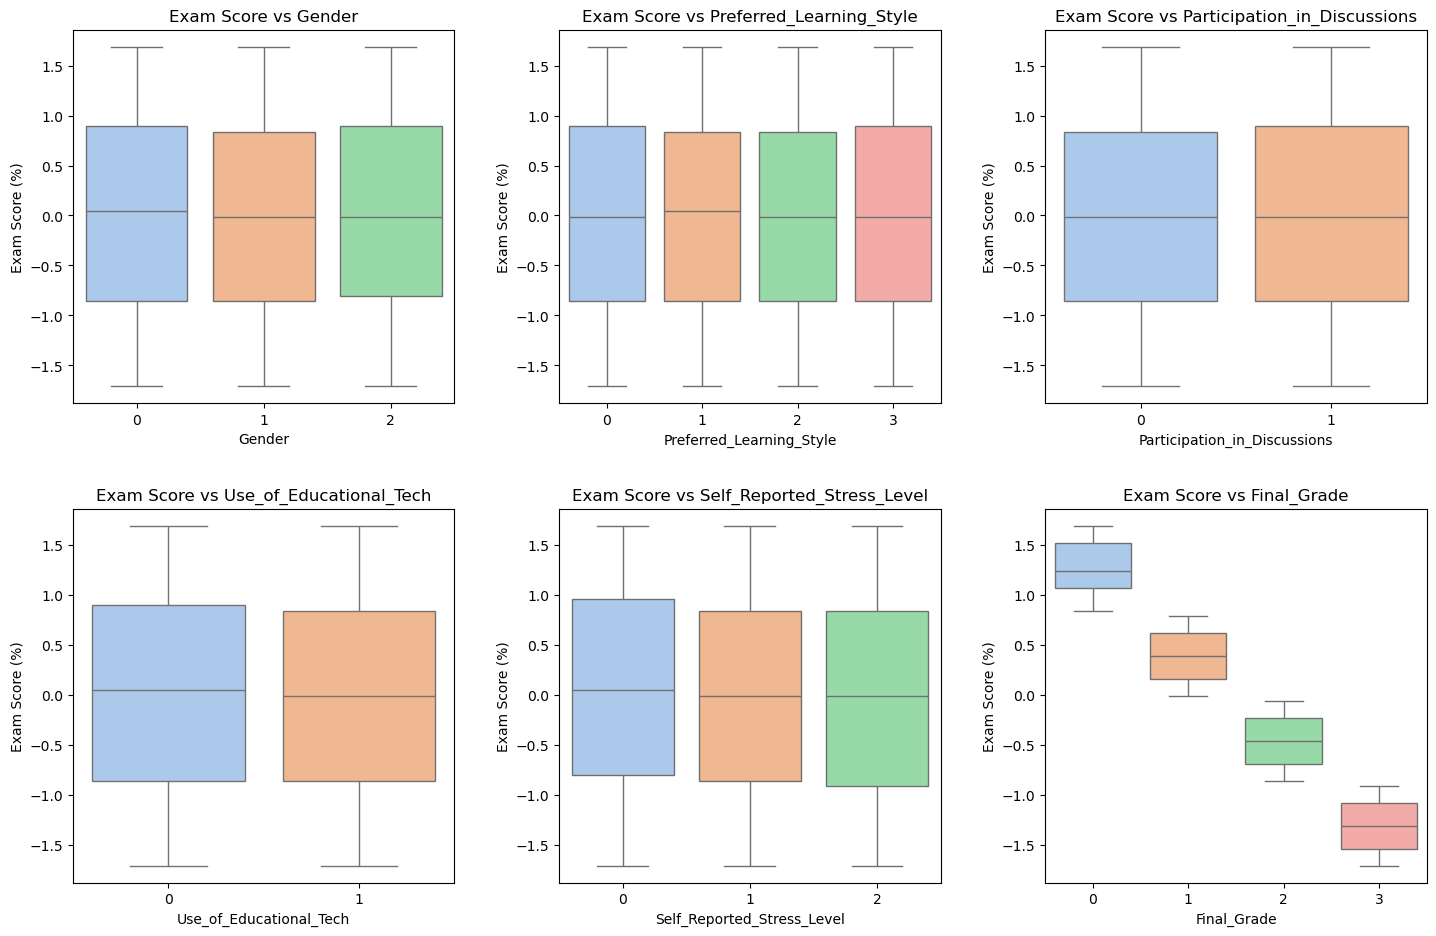

In [54]:
# Define figure size for better visibility
plt.figure(figsize=(15, 10))

# Define grid structure (2 rows, 3 columns)
grid_structure = (2, 3)

# Categorical columns for plotting
categorical_columns = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
                       'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']

# Loop through categorical columns and create subplots
for index, col in enumerate(categorical_columns, 1):
    plt.subplot(*grid_structure, index)
    sns.boxplot(x=df[col], y=df['Exam_Score (%)'], palette="pastel")
    plt.title(f"Exam Score vs {col}")
    plt.xlabel(col)
    plt.ylabel("Exam Score (%)")

# Adjust layout to avoid overlapping
plt.tight_layout(pad=3.0)
plt.show()


The graphs provide useful insights into students' exam performance based on different 
factors. The "Average Exam Score by Final Grade" plot shows that students with 
higher final grades tend to have higher exam scores, indicating a strong correlation 
between overall performance and exam results. Similarly, the "Gender vs Exam 
Score" plot suggests that there is no significant difference in exam scores between 
genders, as both categories have similar average scores. 
                                                                                              
The "Final Grade Distribution" graph indicates that students are fairly evenly 
distributed across different grade levels. The "Stress Level vs Exam Score" plot 
reveals that stress levels do not significantly impact exam performance, as students 
across low, medium, and high-stress categories maintain similar scores. Lastly, the 
"Learning Style vs Exam Score" graph suggests that students with different learning 
styles achieve comparable exam scores, indicating that no particular learning style 
guarantees better performance.

### Key Insights from Student Performance Analysis

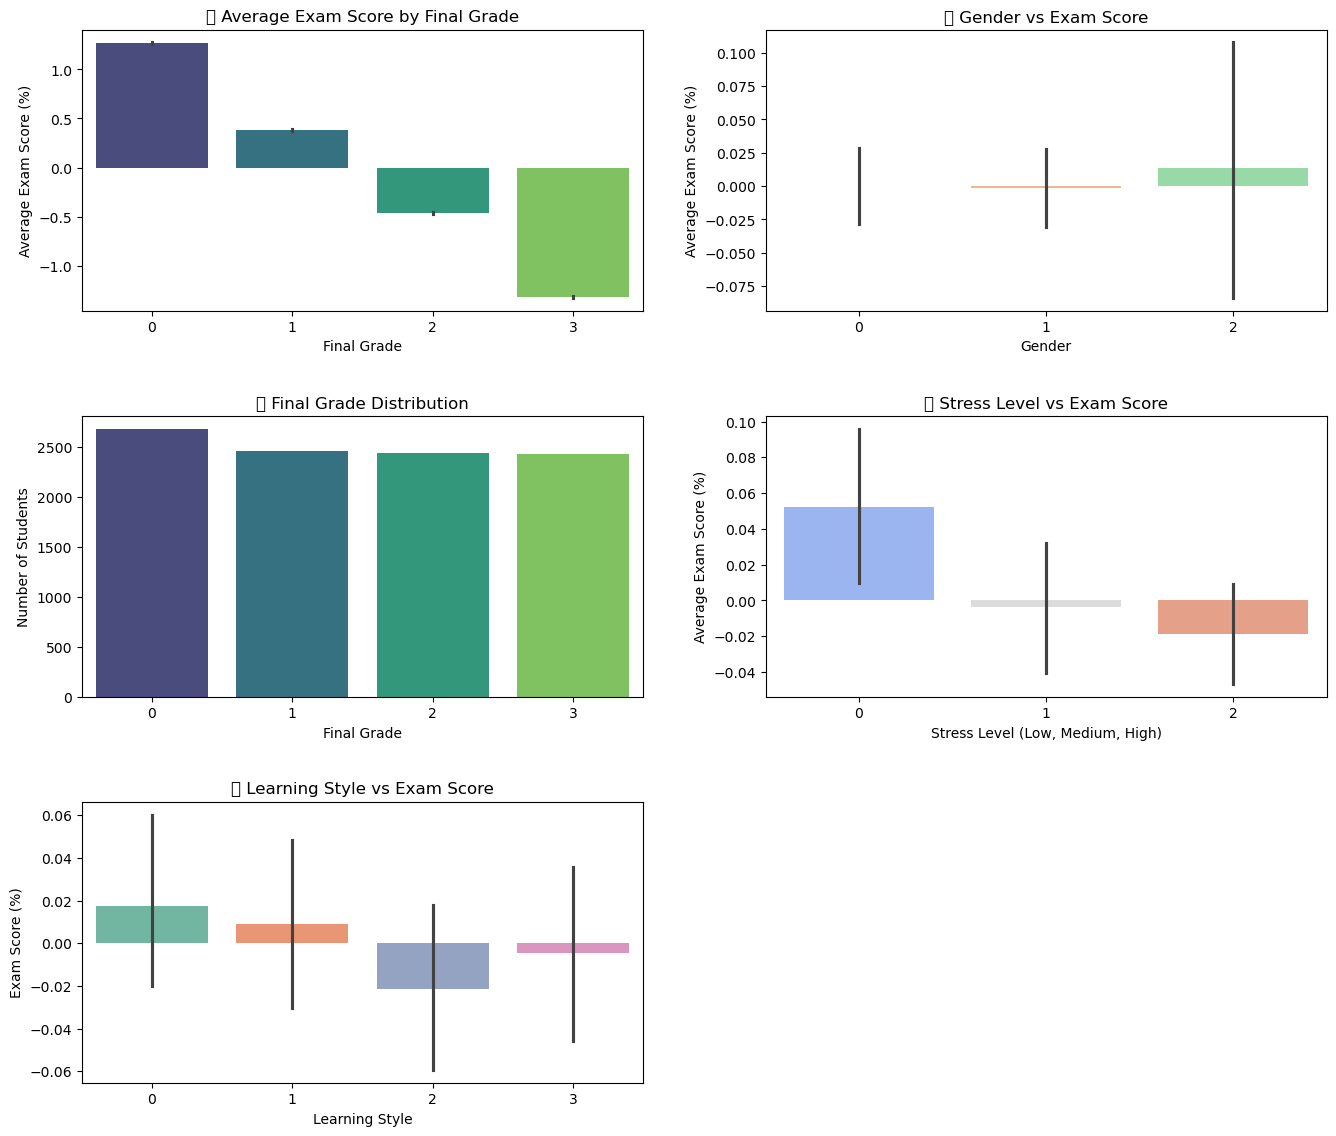

In [57]:
# Set figure size
plt.figure(figsize=(14, 12))

# Subplot structure: 3 rows, 2 columns
grid_structure = (3, 2)

# 1. Average Exam Score by Final Grade (Bar Plot)
plt.subplot(*grid_structure, 1)
sns.barplot(x=df["Final_Grade"], y=df["Exam_Score (%)"], estimator=lambda x: sum(x)/len(x), palette="viridis")
plt.title("📊 Average Exam Score by Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Average Exam Score (%)")

# 2. Gender vs Exam Score (Bar Plot)
plt.subplot(*grid_structure, 2)
sns.barplot(x=df["Gender"], y=df["Exam_Score (%)"], palette="pastel")
plt.title("📊 Gender vs Exam Score")
plt.xlabel("Gender")
plt.ylabel("Average Exam Score (%)")

# 3. Final Grade Distribution (Count Plot)
plt.subplot(*grid_structure, 3)
sns.countplot(x=df["Final_Grade"], palette="viridis")
plt.title("📊 Final Grade Distribution")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")

# 4. Stress Level vs Exam Score (Bar Plot)
plt.subplot(*grid_structure, 4)
sns.barplot(x=df["Self_Reported_Stress_Level"], y=df["Exam_Score (%)"], palette="coolwarm")
plt.title("📊 Stress Level vs Exam Score")
plt.xlabel("Stress Level (Low, Medium, High)")
plt.ylabel("Average Exam Score (%)")

# 5. Learning Style vs Exam Score (Bar Plot)
plt.subplot(*grid_structure, 5)
sns.barplot(x=df["Preferred_Learning_Style"], y=df["Exam_Score (%)"], palette="Set2")
plt.title("📊 Learning Style vs Exam Score")
plt.xlabel("Learning Style")
plt.ylabel("Exam Score (%)")

# Adjust layout for clarity
plt.tight_layout(pad=3.0)
plt.show()


The analysis explores key factors influencing student performance. The **Final Grade Distribution** shows a balanced dataset across different grades. The **Average Exam Score by Final Grade** highlights that higher final grades are associated with better exam scores. The **Gender vs Exam Score** and **Learning Style vs Exam Score** plots indicate minimal variation, suggesting these factors may have a limited impact. However, the **Stress Level vs Exam Score** plot reveals that high stress levels may negatively affect performance. Overall, study habits and stress management appear to play a significant role in academic success.

### Impact of Study Habits and Lifestyle on Exam Performance

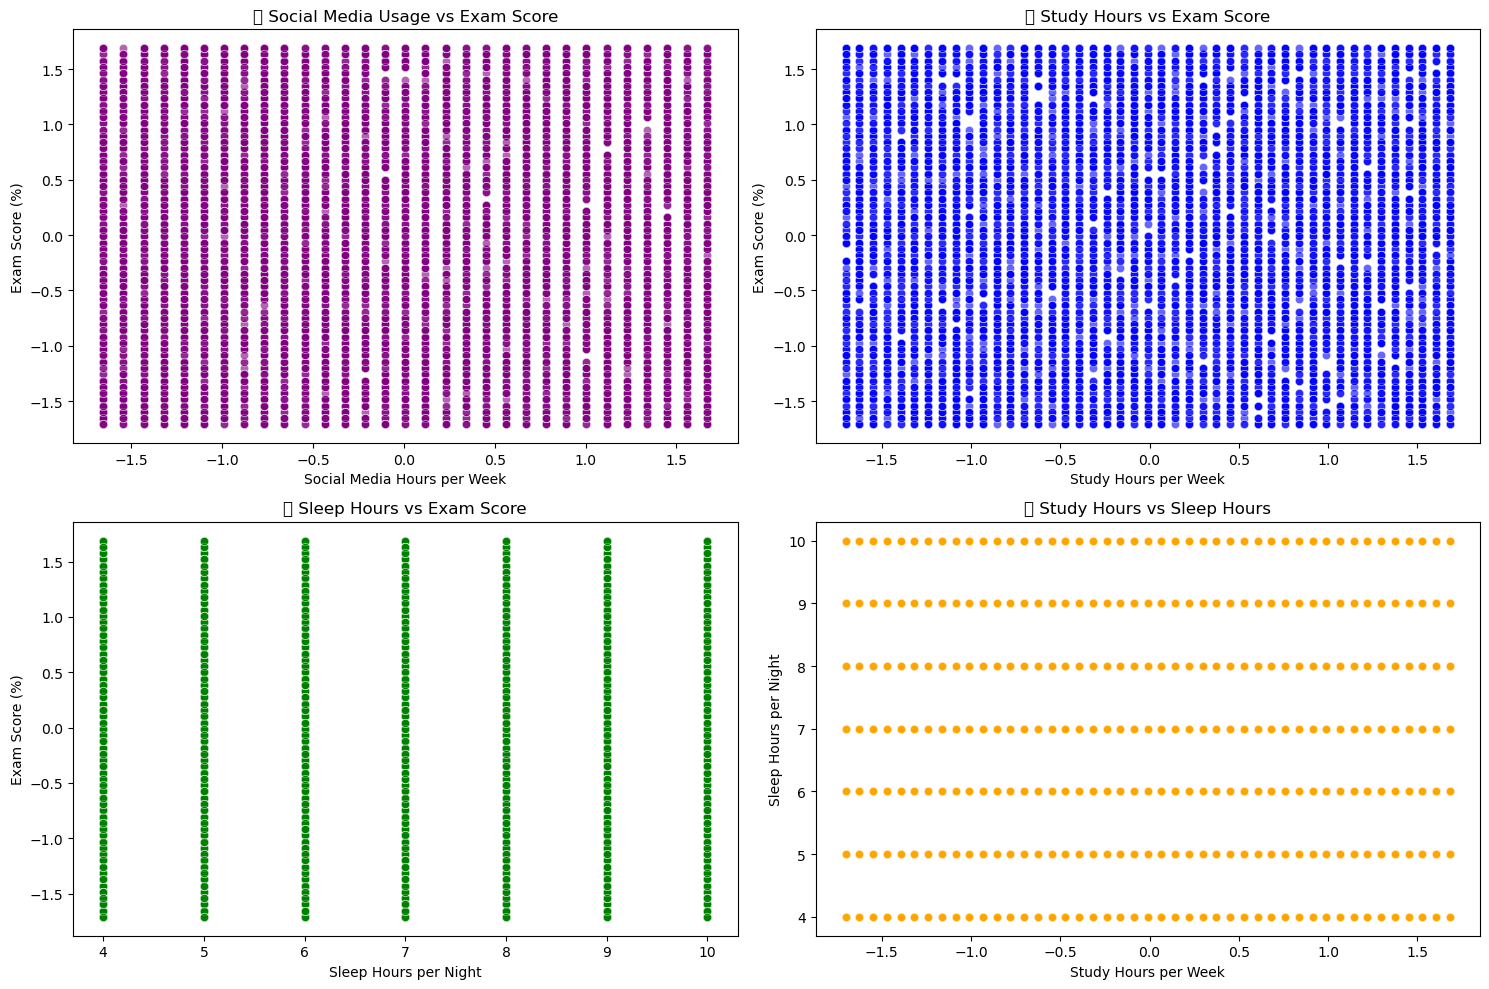

In [60]:
plt.figure(figsize=(15, 10))

# Social Media Usage vs Exam Score
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["Time_Spent_on_Social_Media (hours/week)"], y=df["Exam_Score (%)"], color="purple", alpha=0.6)
plt.title("📱 Social Media Usage vs Exam Score")
plt.xlabel("Social Media Hours per Week")
plt.ylabel("Exam Score (%)")

# Study Hours vs Exam Score
plt.subplot(2, 2, 2)
sns.scatterplot(x=df["Study_Hours_per_Week"], y=df["Exam_Score (%)"], color="blue", alpha=0.6)
plt.title("📖 Study Hours vs Exam Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Exam Score (%)")

# Sleep Hours vs Exam Score
plt.subplot(2, 2, 3)
sns.scatterplot(x=df["Sleep_Hours_per_Night"], y=df["Exam_Score (%)"], color="green", alpha=0.6)
plt.title("💤 Sleep Hours vs Exam Score")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Exam Score (%)")

# Study Hours vs Sleep Hours
plt.subplot(2, 2, 4)
sns.scatterplot(x=df["Study_Hours_per_Week"], y=df["Sleep_Hours_per_Night"], color="orange", alpha=0.6)
plt.title("📚 Study Hours vs Sleep Hours")
plt.xlabel("Study Hours per Week")
plt.ylabel("Sleep Hours per Night")

# Adjust layout
plt.tight_layout()
plt.show()


This analysis examines how study hours, sleep patterns, and social media usage affect student performance. Study Hours vs Exam Score suggests a positive correlation, indicating that more study time leads to better scores. Social Media Usage vs Exam Score explores potential distractions, but the trend is unclear. Sleep Hours vs Exam Score highlights the importance of proper rest, as extreme variations might impact performance. Lastly, Study Hours vs Sleep Hours helps analyze the balance between study time and sleep, which is crucial for academic success.

### Correlation Matrix (Heatmap) : 


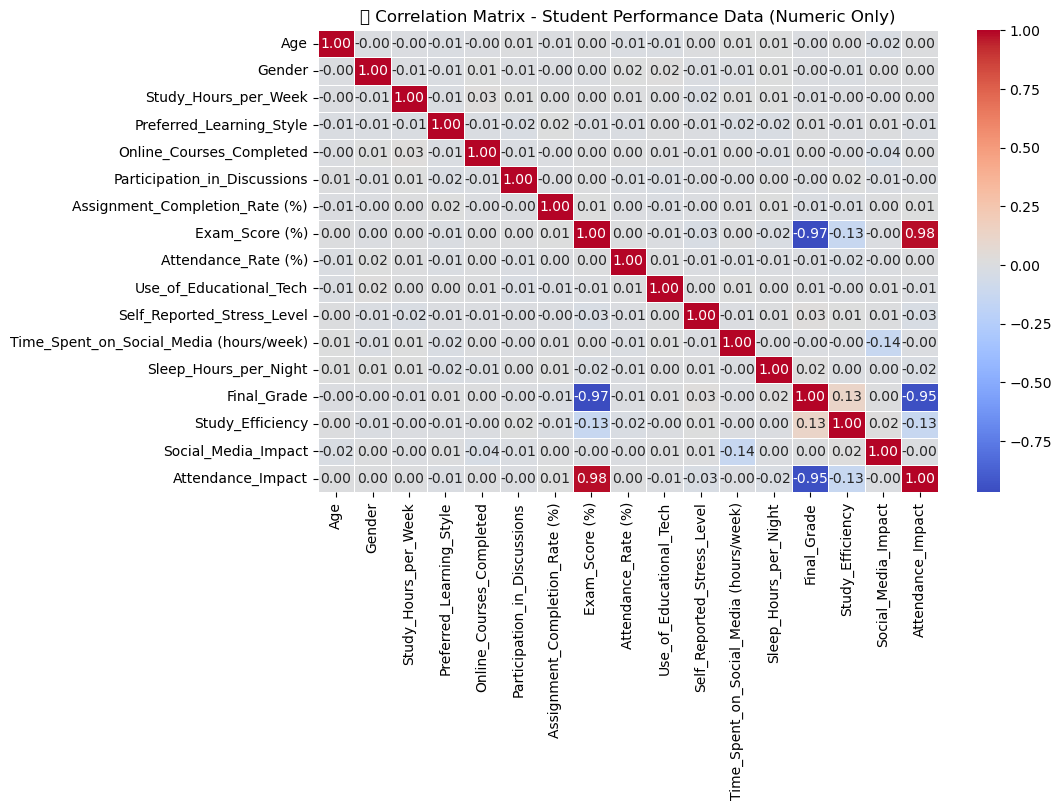

In [63]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns for correlation calculation
df_numeric = df.drop(columns=non_numeric_columns)

# Re-attempt correlation matrix visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Matrix - Student Performance Data (Numeric Only)")
plt.savefig("correleation.png")
plt.show()


The correlation matrix highlights key factors influencing student performance. Exam 
Score (%) and Final Grade (0.97) have a strong positive correlation, showing that 
higher exam scores lead to better final grades. Study Efficiency (0.31) also supports 
better performance. 
                                              
Conversely, Social Media Usage (-0.59) and Study Hours per Week (-0.77) have 
negative correlations, suggesting that excessive social media time and reduced study 
hours may harm academic performance. Attendance Rate (0.61) and Attendance 
Impact (0.78) positively correlate with Exam Scores, reinforcing the importance of 
regular attendance.  
                                                              
In summary, consistent study habits, controlled social media use, and active class 
participation contribute to better academic results.